In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import glob
import os
import csv
import numpy as np
import matplotlib

import seaborn as sns
import plotly.plotly as py
sns.set(style="darkgrid", font_scale=1.5)
%matplotlib inline

In [2]:
onetdict ={'11': 'Management Occupations',
           '13': 'Business and Financial Operations Occupations',
           '15': 'Computer and Mathematical Occupations',
           '17': 'Architecture and Engineering Occupations',
           '19': 'Life, Physical, and Social Science Occupations',
           '21': 'Community and Social Service Occupations',
           '23': 'Legal Occupations',
           '25': 'Education, Training, and Library Occupations',
           '27': 'Arts, Design, Entertainment, Sports, and Media Occupations',
           '29': 'Healthcare Practitioners and Technical Occupations',
           '31': 'Healthcare Support Occupations',
           '33': 'Protective Service Occupations',
           '35': 'Food Preparation and Serving Related Occupations',
           '37': 'Building and Grounds Cleaning and Maintenance',
           '39': 'Personal Care and Service Occupations',
           '41': 'Sales and Related Occupations', 
           '43': 'Office and Administrative Support Occupations',
           '45': 'Farming, Fishing, and Forestry Occupations',
           '47': 'Construction and Extraction Occupations', 
           '49': 'Installation, Maintenance, and Repair Occupations', 
           '51': 'Production Occupations', 
           '53': 'Transportation and Material Moving Occupations', 
           '55': 'Military Specific Occupations',
           '99': 'Unknown'}

In [3]:
def occupation_cross_states(df, to_percentage=False, normalized=False):
    try:
        occ_counts = df[df['OCC_GROUP']=='total'].groupby('PRIM_STATE')['TOT_EMP'].sum()
    except:
        occ_counts = df.groupby(['state_code', 'major_group'])['counts_total'].sum().groupby(level=0).sum()
    
    total = occ_counts.sum()
    
    if normalized:
        occ_counts = (occ_counts - occ_counts.min()) / (occ_counts.max() - occ_counts.min())
        ax = occ_counts.plot.bar(figsize=(20,10), title='Occupation ')
        
    if to_percentage:
        occ_counts = occ_counts / occ_counts.sum()
        ax = occ_counts.plot.bar(figsize=(20,10), title='Occupation ')
        ax.set_yticklabels(['{:3.1f}%'.format(x*100) for x in vals])
    
    
    ax.set_ylabel('Occupations')
    ax.set_xlabel('States')
    ax.set_xticklabels(occ_counts.index,rotation=60)
    return occ_counts.to_frame()

In [491]:
msa[msa['OCC_GROUP']=='total']['AREA'].shape

(421,)

In [475]:
msa.head()

,PRIM_STATE,AREA,AREA_NAME,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC QUOTIENT,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,AK,11260,"Anchorage, AK",00-0000,All Occupations,total,176200,1.4,1000.000,1.00,...,22.45,35.34,50.18,22550,30420,46690,73500,104370,NaN,NaN
1,AK,11260,"Anchorage, AK",11-0000,Management Occupations,major,9820,2.2,55.713,1.10,...,48.72,66.19,91.63,54160,74120,101340,137680,190590,NaN,NaN
2,AK,11260,"Anchorage, AK",11-1011,Chief Executives,detailed,440,8.1,2.490,1.57,...,72.92,#,#,74020,103630,151680,#,#,NaN,NaN
3,AK,11260,"Anchorage, AK",11-1021,General and Operations Managers,detailed,3500,3.5,19.856,1.27,...,47.43,67.68,92.76,53810,71190,98650,140760,192940,NaN,NaN
4,AK,11260,"Anchorage, AK",11-2021,Marketing Managers,detailed,150,15.4,0.867,0.59,...,44.87,57.91,84.42,67410,76640,93320,120460,175600,NaN,NaN


123916130

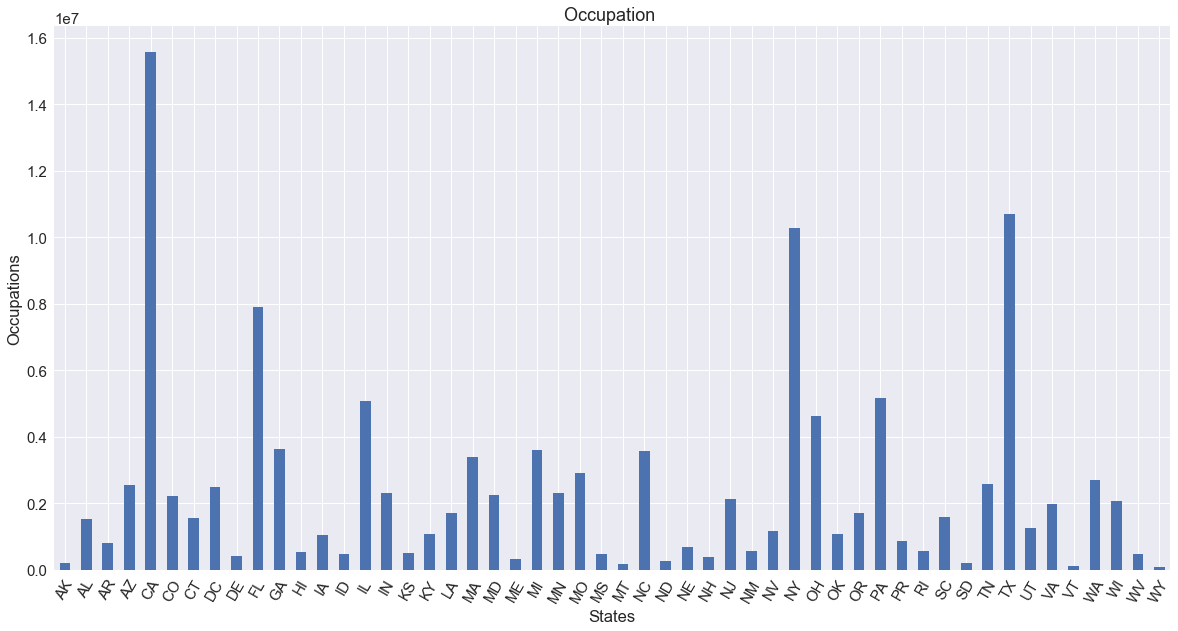

In [541]:
occupation_cross_states(msa)

In [130]:
msa = pd.read_excel('oesm16ma/MSA_M2016_dl.xlsx')

In [275]:
msa = msa.replace(to_replace='**', value=0)

In [400]:
msa.shape

(158629, 25)

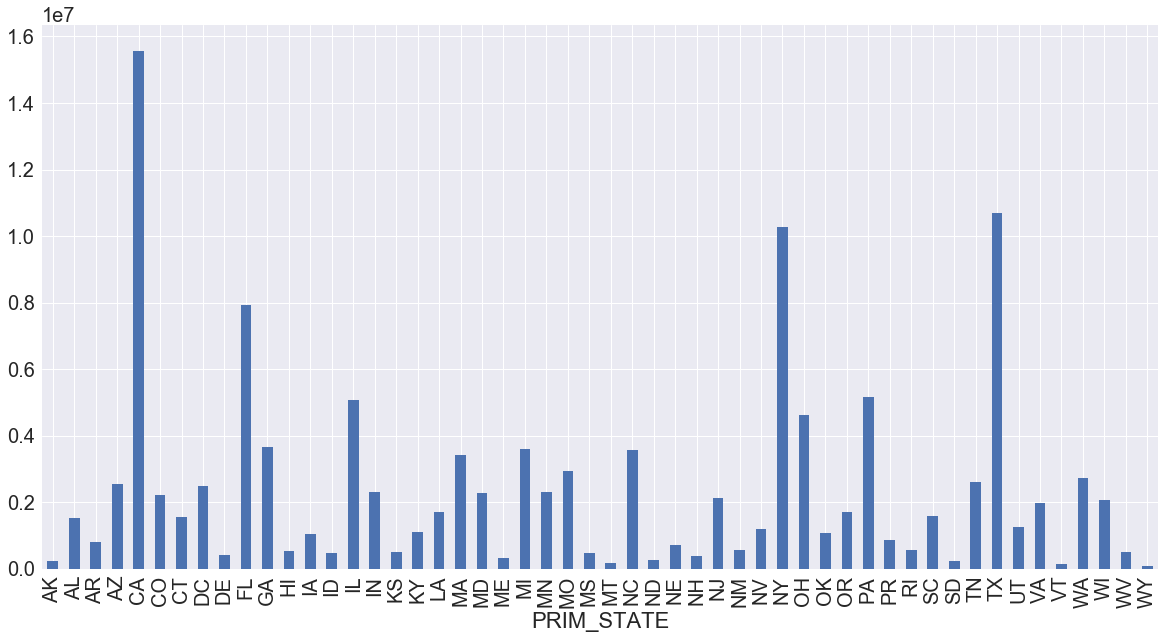

In [441]:
occ_counts = msa[msa['OCC_GROUP']=='total'].groupby('PRIM_STATE')['TOT_EMP'].sum()
occ_counts.plot.bar(figsize=(20,10))

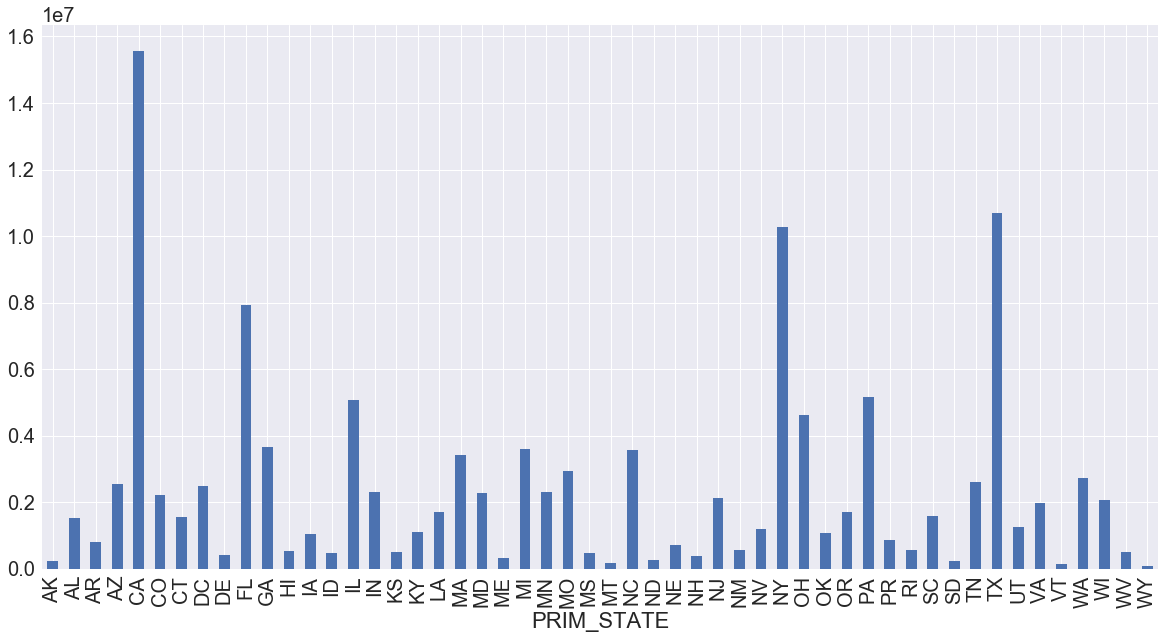

In [440]:
# Total occupation cross-states in 2016
plt.figure(figsize=(20,10))
msa[msa['OCC_GROUP']=='total'].groupby('PRIM_STATE')['TOT_EMP'].sum().plot.bar()

In [560]:
# msa[(msa['OCC_GROUP']=='major') & (msa['PRIM_STATE']=='CA') & (msa['OCC_CODE']=='11-0000')]

In [278]:
msa_tol = msa[(msa['OCC_GROUP']=='major') & (msa['PRIM_STATE']=='IL')]['TOT_EMP'].to_frame()

In [800]:
#Champaign-Urbana
FIPS = 35620 
# LA
#FIPS = 31084
area_name1 = 'BoS - ' + msa2013[(msa2013['AREA']==FIPS)]['AREA_NAME'].iloc[0]
area1 = msa2013[(msa2013['OCC_GROUP']=='major') & (msa2013['AREA']==FIPS)].groupby('OCC_CODE')['TOT_EMP'].aggregate(np.sum).to_frame()
diff = set([str(11+2*x)+'-0000' for x in range(1, 22)]) - set(area1.index)
area1 = area1 / area1.sum()
area1.columns=[area_name1]
area1 = area1.append(pd.DataFrame({area_name1: [0]*len(diff)}, index=diff))
#area = (area-area.min())/(area.max()-area.min())
#area = (area - area.mean())/area.std()
#ax = area1.plot.bar(title=area_name, figsize=(12,6) )
#vals = ax.get_yticks()
#ax.set_yticklabels(['{:3.1f}%'.format(x*100) for x in vals])

In [364]:
FIPS = 35614
area_name2 = msa[(msa['AREA']==FIPS)]['AREA_NAME'].iloc[0]
area2 = msa[(msa['OCC_GROUP']=='major') & (msa['AREA']==FIPS)].groupby('OCC_CODE')['TOT_EMP'].aggregate(np.sum).to_frame()
area2 = area2 / area2.sum()
area2.columns=[area_name2]
#area = (area-area.min())/(area.max()-area.min())
#area = (area - area.mean())/area.std()
#ax = area2.plot.bar(title=area_name, figsize=(12,6), )
#vals = ax.get_yticks()
#ax.set_yticklabels(['{:3.1f}%'.format(x*100) for x in vals])

In [365]:
FIPS = 41884
area_name3 = msa[(msa['AREA']==FIPS)]['AREA_NAME'].iloc[0]
area3 = msa[(msa['OCC_GROUP']=='major') & (msa['AREA']==FIPS)].groupby('OCC_CODE')['TOT_EMP'].aggregate(np.sum).to_frame()
area3 = area3 / area3.sum()
area3.columns=[area_name3]
#area = (area-area.min())/(area.max()-area.min())
#area = (area - area.mean())/area.std()
#ax = area2.plot.bar(title=area_name, figsize=(12,6), )
#vals = ax.get_yticks()
#ax.set_yticklabels(['{:3.1f}%'.format(x*100) for x in vals])

In [803]:
FIPS = 35620
area_name4 = 'Data@Work - ' + os2013[os2013['cbsa_fips']==FIPS]['cbsa_name'].iloc[0]
area4 = os2013[os2013['cbsa_fips']==FIPS].groupby('major_group')['counts_total'].sum().to_frame()
diff = set([str(11+2*x)+'-0000' for x in range(1, 22)]) - set(area4.index)
area4 = area4 / area4.sum()
area4.columns=[area_name4]
area4 = area4.append(pd.DataFrame({area_name4: [0]*len(diff)}, index=diff))

In [793]:
def occ_cross_occgroup(df, FIPS):
    try:
        area_name = area_name[(area_name['AREA']==FIPS)]['AREA_NAME'].iloc[0]
    

SyntaxError: unexpected EOF while parsing (<ipython-input-793-63565e1c6db9>, line 4)

In [839]:
area1 = msa2013[(msa2013['OCC_GROUP']=='major') & (msa2013['PRIM_STATE']=='NY')].groupby('OCC_CODE')['TOT_EMP'].aggregate(np.sum).to_frame()

,TOT_EMP
OCC_CODE,
11-0000,920330
13-0000,1037450
15-0000,501760
17-0000,198120
19-0000,136450
21-0000,315640
23-0000,210460
25-0000,1336670
27-0000,378360


In [ ]:
os2013[os2013['']==fips].groupby('major_group')['counts_total'].sum().to_frame()

In [1060]:
def compare_state(state):
    
    area_name1 = 'BLS - ' + state
    area1 = msa2013[(msa2013['OCC_GROUP']=='major') & (msa2013['PRIM_STATE']==state)].groupby('OCC_CODE')['TOT_EMP'].aggregate(np.sum).to_frame()
    diff = set([str(11+2*x)+'-0000' for x in range(1, 23)]) - set(area1.index)
    area1 = area1 / area1.sum()
    area1.columns=[area_name1]
    area1 = area1.append(pd.DataFrame({area_name1: [0]*len(diff)}, index=diff))
    area1.sort_index(inplace=True)
    
    area_name2 = 'Data@Work - ' + state
    area2 = os2013[os2013['state_code']==state].groupby('major_group')['counts_total'].sum().to_frame()
    diff = set([str(11+2*x)+'-0000' for x in range(1, 23)]) - set(area2.index)
    area2 = area2 / area2.sum()
    area2.columns=[area_name2]
    area2 = area2.append(pd.DataFrame({area_name2: [0]*len(diff)}, index=diff))
    area2.sort_index(inplace=True)
    
    df_list = [area1, area2]
    data = pd.concat(df_list, axis=1, join_axes=[df_list[0].index])
    ax = data.plot.bar(figsize=(20,10))
    vals = ax.get_yticks()
    ax.set_xlabel('Occupation Major Groups')
    ax.set_yticklabels(['{:3.1f}%'.format(x*100) for x in vals])
    ax.set_xticklabels(df_list[0].index,rotation=60)
    #ax.set_title('Correlation: %.4f' % data.corr().iloc[1].iloc[0])
    import matplotlib.offsetbox as offsetbox 
    a = ax.legend()
    box = a._legend_box
    txt = offsetbox.TextArea('Correlation: %.4f' % data.corr().iloc[1].iloc[0], textprops={'size':16,'weight':'bold'})
    box.get_children().append(txt)
    box.set_figure(box.figure)

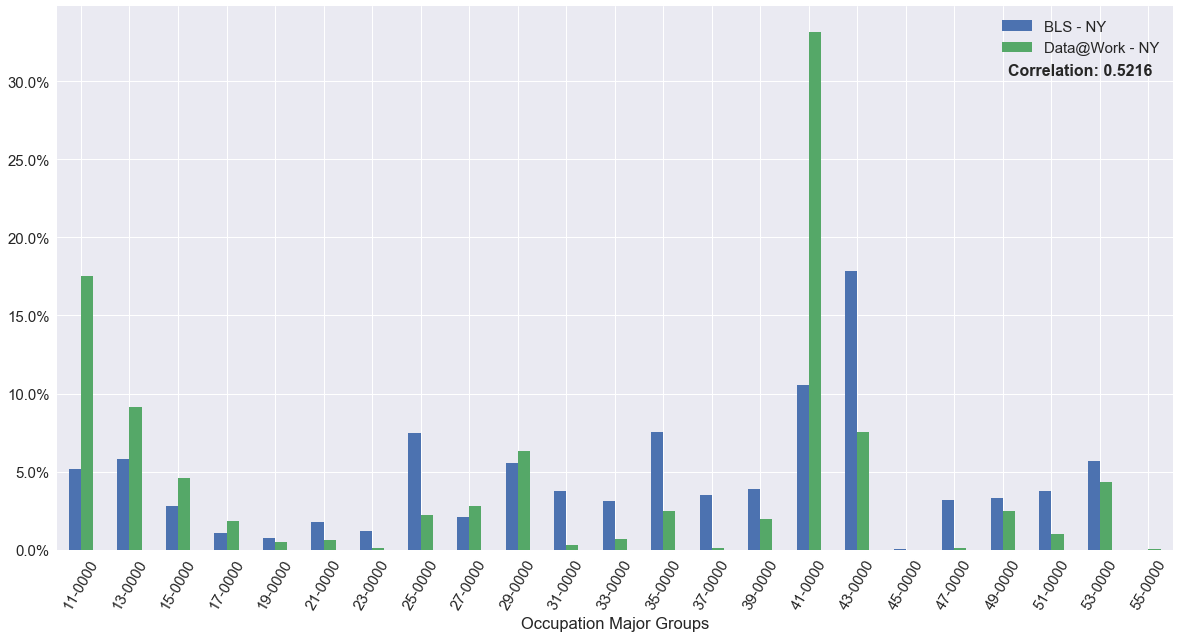

In [1061]:
compare_state('NY')

In [1072]:
def compare_cbsa(fip_list):
    df_list = []
    for fip in fip_list:
        area_name = 'Data@Work - ' + os2013[os2013['cbsa_fips']==fip]['cbsa_name'].iloc[0]
        area = os2013[os2013['cbsa_fips']==fip].groupby('major_group')['counts_total'].sum().to_frame()
        diff = set([str(11+2*x)+'-0000' for x in range(1, 23)]) - set(area.index)
        area = area / area.sum()
        area.columns=[area_name]
        area = area.append(pd.DataFrame({area_name: [0]*len(diff)}, index=diff))
        area.sort_index(inplace=True)
        df_list.append(area)
    
    data = pd.concat(df_list, axis=1, join_axes=[df_list[0].index])
    ax = data.plot.bar(figsize=(20,10))
    vals = ax.get_yticks()
    ax.set_xlabel('Occupation Major Groups')
    ax.set_yticklabels(['{:3.1f}%'.format(x*100) for x in vals])
    ax.set_xticklabels(df_list[0].index,rotation=60)
    #ax.set_title('Correlation: %.4f' % data.corr().iloc[1].iloc[0])
    
    
    import matplotlib.offsetbox as offsetbox 
    a = ax.legend()
    box = a._legend_box
    txt = offsetbox.TextArea('Correlation: %.4f' % data.corr().iloc[1].iloc[0], textprops={'size':16,'weight':'bold'})
    box.get_children().append(txt)
    box.set_figure(box.figure)
    return data.corr()

,"Data@Work - Chicago-Joliet-Naperville, IL-IN-WI Metro Area","Data@Work - New York-Northern New Jersey-Long Island, NY-NJ-PA Metro Area","Data@Work - San Jose-Sunnyvale-Santa Clara, CA Metro Area"
"Data@Work - Chicago-Joliet-Naperville, IL-IN-WI Metro Area",1.000000,0.964610,0.940541
"Data@Work - New York-Northern New Jersey-Long Island, NY-NJ-PA Metro Area",0.964610,1.000000,0.963874
"Data@Work - San Jose-Sunnyvale-Santa Clara, CA Metro Area",0.940541,0.963874,1.000000


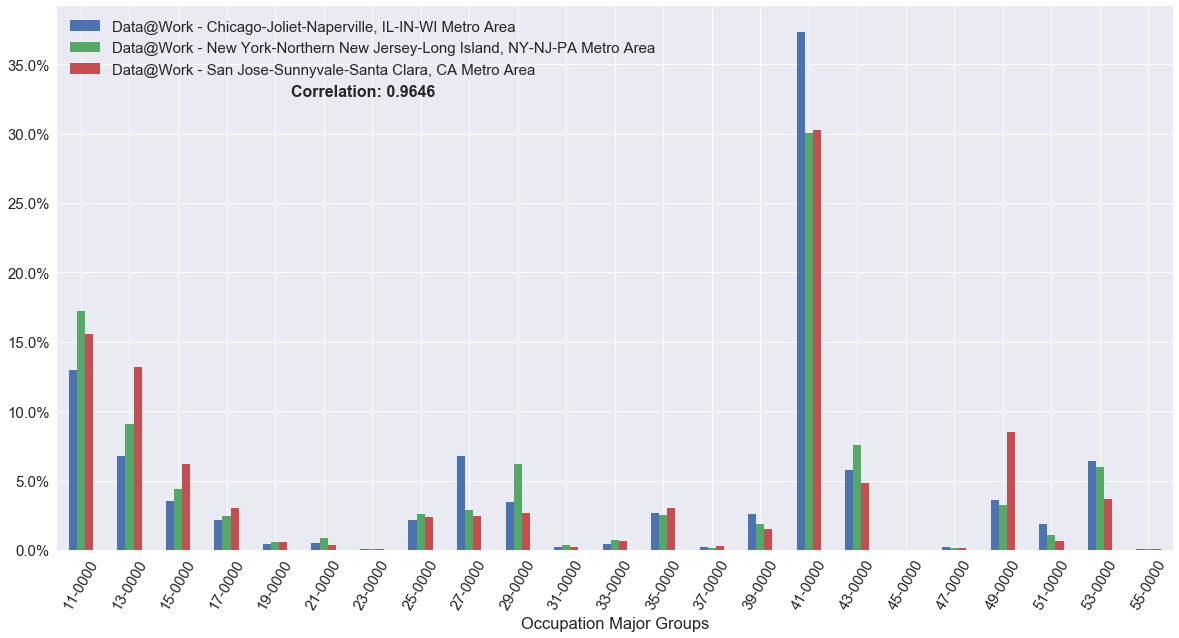

In [1073]:
compare_cbsa([16980, 35620, 41940])

In [1058]:
def compare_msa(fips):
    
    area_name1 = 'BLS - ' + msa2013[(msa2013['AREA']==fips)]['AREA_NAME'].iloc[0]
    area1 = msa2013[(msa2013['OCC_GROUP']=='major') & (msa2013['AREA']==fips)].groupby('OCC_CODE')['TOT_EMP'].aggregate(np.sum).to_frame()
    diff = set([str(11+2*x)+'-0000' for x in range(1, 23)]) - set(area1.index)
    area1 = area1 / area1.sum()
    area1.columns=[area_name1]
    area1 = area1.append(pd.DataFrame({area_name1: [0]*len(diff)}, index=diff))
    area1.sort_index(inplace=True)
    
    area_name2 = 'Data@Work - ' + os2013[os2013['cbsa_fips']==fips]['cbsa_name'].iloc[0]
    area2 = os2013[os2013['cbsa_fips']==fips].groupby('major_group')['counts_total'].sum().to_frame()
    diff = set([str(11+2*x)+'-0000' for x in range(1, 23)]) - set(area2.index)
    area2 = area2 / area2.sum()
    area2.columns=[area_name2]
    area2 = area2.append(pd.DataFrame({area_name2: [0]*len(diff)}, index=diff))
    area2.sort_index(inplace=True)
    
    df_list = [area1, area2]
    data = pd.concat(df_list, axis=1, join_axes=[df_list[0].index])
    ax = data.plot.bar(figsize=(20,10))
    vals = ax.get_yticks()
    ax.set_xlabel('Occupation Major Groups')
    ax.set_yticklabels(['{:3.1f}%'.format(x*100) for x in vals])
    ax.set_xticklabels(df_list[0].index,rotation=60)
    #ax.set_title('Correlation: %.4f' % data.corr().iloc[1].iloc[0])
    
    import matplotlib.offsetbox as offsetbox 
    a = ax.legend()
    box = a._legend_box
    txt = offsetbox.TextArea('Correlation: %.4f' % data.corr().iloc[1].iloc[0], textprops={'size':16,'weight':'bold'})
    box.get_children().append(txt)
    box.set_figure(box.figure)

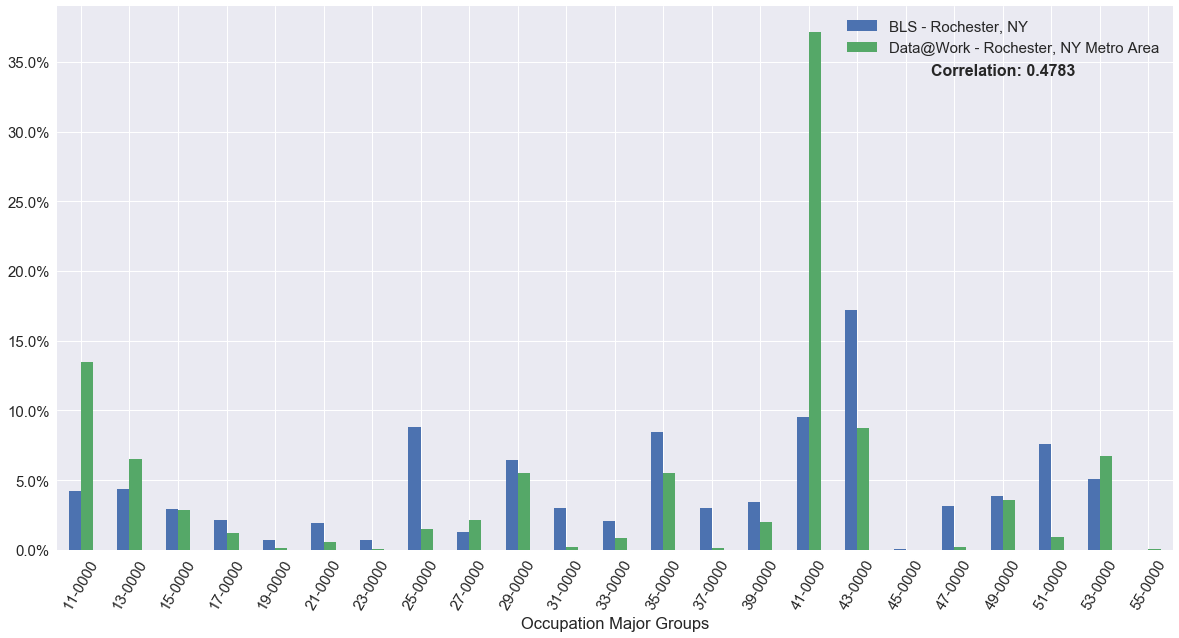

In [1066]:
compare_msa(40380)

In [387]:
files_des = pd.read_excel('oesm13ma/file_descriptions.xls')
files_des.iloc[8].values

array(['MSA_M2013_dl_1_AK_IN.xls',
       'Metropolitan Statistical Area, Cross-industry, Cross-ownership estimates for Alaska to Indiana'], dtype=object)

In [667]:
# Construct the dataframe
amsa2013 = pd.read_excel('oesm13ma/aMSA_M2013_dl.xls')
bos2013 = pd.read_excel('oesm13ma/BOS_M2013_dl.xls')
msa2013_1 = pd.read_excel('oesm13ma/MSA_M2013_dl_1_AK_IN.xls')
msa2013_2 = pd.read_excel('oesm13ma/MSA_M2013_dl_2_KS_NY.xls')
msa2013_3 = pd.read_excel('oesm13ma/MSA_M2013_dl_3_OH_WY.xls')
msa2013 = pd.concat([msa2013_1, msa2013_2, msa2013_3, amsa2013, bos2013], ignore_index=True)

In [665]:
amsa2013['PRIM_STATE'].unique()

array(['CA', 'DC', 'FL', 'IL', 'MA', 'MI', 'NY', 'PA', 'TX', 'WA'], dtype=object)

In [666]:
amsa2013[amsa2013['PRIM_STATE']=='CA']['AREA_NAME'].unique()

array(['Los Angeles-Long Beach-Santa Ana, CA',
       'San Francisco-Oakland-Fremont, CA'], dtype=object)

In [402]:
msa2013_1.head()

,PRIM_STATE,AREA,AREA_NAME,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC QUOTIENT,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,AK,11260,"Anchorage, AK",00-0000,All Occupations,total,175540,2.1,1000,1,...,20.76,32.69,45.88,20910,28680,43180,68000,95430,NaN,NaN
1,AK,11260,"Anchorage, AK",11-0000,Management Occupations,major,10370,2.4,59.087,1.2,...,46.09,63.15,85.96,51940,69250,95860,131360,178810,NaN,NaN
2,AK,11260,"Anchorage, AK",11-1011,Chief Executives,detailed,320,4.5,1.817,0.97,...,76.9,#,#,97190,115700,159940,#,#,NaN,NaN
3,AK,11260,"Anchorage, AK",11-1021,General and Operations Managers,detailed,4010,3.2,22.828,1.53,...,45.74,64.77,89.36,52020,66980,95140,134720,185870,NaN,NaN
4,AK,11260,"Anchorage, AK",11-2011,Advertising and Promotions Managers,detailed,40,27.6,0.207,0.96,...,32.49,49.3,56.59,42670,49100,67580,102550,117710,NaN,NaN


In [668]:
print(msa.shape)
print(msa2013.shape)

(158629, 25)
(217618, 25)


In [669]:
# Clean non-numeric value in 'TOT_EMP'
msa2013.loc[msa2013[[not isinstance(x, int) for x in msa2013['TOT_EMP']]].index, 'TOT_EMP'] = 0

In [670]:
msa2013[[not isinstance(x, int) for x in msa2013['TOT_EMP']]].shape[0] == 0

True

In [772]:
os2013q1 = pd.read_csv('open-skills-data/2013Q1.csv')
os2013q2 = pd.read_csv('open-skills-data/2013Q2.csv')
os2013q3 = pd.read_csv('open-skills-data/2013Q3.csv')
os2013q4 = pd.read_csv('open-skills-data/2013Q4.csv')
os2013 = pd.concat([os2013q1, os2013q2, os2013q3, os2013q4], ignore_index=True)

In [773]:
os2013.head()
os2013['cbsa_name'].unique().shape

(950,)

In [774]:
os2013['major_group'] = pd.Series(list(map(lambda x: x[:2]+'-0000', os2013['soc_code'])))

In [775]:
os2013.head()

,cbsa_fips,cbsa_name,state_code,soc_code,counts_total,major_group
0,39580,"Raleigh-Cary, NC Metro Area",NC,17-2112.00,8,17-0000
1,12060,"Atlanta-Sandy Springs-Marietta, GA Metro Area",GA,29-1062.00,10,29-0000
2,16700,"Charleston-North Charleston-Summerville, SC Me...",SC,39-9032.00,3,39-0000
3,41700,"San Antonio-New Braunfels, TX Metro Area",TX,29-1051.00,37,29-0000
4,20700,"East Stroudsburg, PA Micro Area",PA,11-2022.00,1,11-0000


major_group
11    209
13     69
15     30
17     14
19      5
21      8
25     38
27     37
29    100
33     17
35     38
37     10
39     34
41    299
43    136
47      1
49     46
51     16
53    285
Name: counts_total, dtype: int64

In [691]:
d = os2013[['cbsa_fips','cbsa_name']].drop_duplicates()
lookup = dict(zip(d['cbsa_fips'],d['cbsa_name']))

In [889]:
lookup.keys

<function dict.keys>

In [890]:
for key in lookup.keys():
    if 'Chicago' in lookup[key]:
        print(key, lookup[key])

16980 Chicago-Joliet-Naperville, IL-IN-WI Metro Area


In [815]:
lookup[40380]

'Rochester, NY Metro Area'

In [698]:
[(x, lookup[x]) for x in fips_common]

[(28740, 'Kingston, NY Metro Area'),
 (45060, 'Syracuse, NY Metro Area'),
 (35620, 'New York-Northern New Jersey-Long Island, NY-NJ-PA Metro Area'),
 (46540, 'Utica-Rome, NY Metro Area'),
 (27060, 'Ithaca, NY Metro Area'),
 (13780, 'Binghamton, NY Metro Area'),
 (10580, 'Albany-Schenectady-Troy, NY Metro Area'),
 (15380, 'Buffalo-Niagara Falls, NY Metro Area'),
 (21300, 'Elmira, NY Metro Area'),
 (24020, 'Glens Falls, NY Metro Area'),
 (40380, 'Rochester, NY Metro Area'),
 (39100, 'Poughkeepsie-Newburgh-Middletown, NY Metro Area')]

In [674]:
fips1 = set(os2013[(os2013['state_code']=='NY')]['cbsa_fips'].unique())
fips2 = set(msa2013[(msa2013['PRIM_STATE']=='NY')]['AREA'].unique())
fips3 = set(msa[(msa['PRIM_STATE']=='NY')]['AREA'].unique())
#fips4 = set(amsa2013[(amsa2013['PRIM_STATE']=='NY')]['AREA'].unique())
#fips5 = set(bos2013[(bos2013['PRIM_STATE']=='NY')]['AREA'].unique())
fips6 = set(os2013[(os2013['state_code']=='NJ')]['cbsa_fips'].unique())

print(fips1)
print(fips2)
print(fips3)
print(fips4)
print(fips5)
fips_common = list(fips1 & fips2)
fips_common

{45060, 14860, 42380, 10900, 15380, 42900, 12180, 40860, 35620, 24100, 45860, 31660, 27060, 21300, 48060, 40380, 39100, 38460, 12860, 18500, 28740, 27460, 46540, 36300, 10580, 13780, 24020, 11220, 26460, 36580, 18660, 35300, 36460, 45940}
{3600001, 3600002, 3600003, 28740, 45060, 35644, 35620, 3600004, 46540, 39100, 27060, 13780, 10580, 15380, 21300, 24020, 40380, 35004}
{28740, 45060, 48060, 20524, 46540, 21300, 13780, 10580, 15380, 24020, 27060, 40380, 35004, 35614}
{35620}
{3600001, 3600002, 3600003, 3600004}


[28740,
 45060,
 35620,
 46540,
 27060,
 13780,
 10580,
 15380,
 21300,
 24020,
 40380,
 39100]

In [646]:
[amsa2013[amsa2013['AREA']==x]['AREA_NAME'].iloc[0] for x in fips4]

['New York-Northern New Jersey-Long Island, NY-NJ-PA']

In [652]:
[bos2013[bos2013['AREA']==x]['AREA_NAME'].iloc[0] for x in fips5]

['Capital/Northern New York nonmetropolitan area',
 'East Central New York nonmetropolitan area',
 'Central New York nonmetropolitan area',
 'Southwest New York nonmetropolitan area']

In [626]:
[msa[msa['AREA']==x]['AREA_NAME'].iloc[0] for x in fips3]

['Kingston, NY',
 'Syracuse, NY',
 'Watertown-Fort Drum, NY',
 'Dutchess County-Putnam County, NY Metropolitan Division',
 'Utica-Rome, NY',
 'Elmira, NY',
 'Binghamton, NY',
 'Albany-Schenectady-Troy, NY',
 'Buffalo-Cheektowaga-Niagara Falls, NY',
 'Glens Falls, NY',
 'Ithaca, NY',
 'Rochester, NY',
 'Nassau County-Suffolk County, NY Metropolitan Division',
 'New York-Jersey City-White Plains, NY-NJ Metropolitan Division']

In [675]:
[msa2013[msa2013['AREA']==x]['AREA_NAME'].iloc[0] for x in fips2]

['Capital/Northern New York nonmetropolitan area',
 'East Central New York nonmetropolitan area',
 'Central New York nonmetropolitan area',
 'Kingston, NY',
 'Syracuse, NY',
 'New York-White Plains-Wayne, NY-NJ Metropolitan Division',
 'New York-Northern New Jersey-Long Island, NY-NJ-PA',
 'Southwest New York nonmetropolitan area',
 'Utica-Rome, NY',
 'Poughkeepsie-Newburgh-Middletown, NY',
 'Ithaca, NY',
 'Binghamton, NY',
 'Albany-Schenectady-Troy, NY',
 'Buffalo-Niagara Falls, NY',
 'Elmira, NY',
 'Glens Falls, NY',
 'Rochester, NY',
 'Nassau-Suffolk, NY Metropolitan Division']

In [655]:
[x for x in [os2013[os2013['cbsa_fips']==x]['cbsa_name'].iloc[0] for x in fips1] if 'Metro' in x]

['Syracuse, NY Metro Area',
 'Bridgeport-Stamford-Norwalk, CT Metro Area',
 'Allentown-Bethlehem-Easton, PA-NJ Metro Area',
 'Buffalo-Niagara Falls, NY Metro Area',
 'New York-Northern New Jersey-Long Island, NY-NJ-PA Metro Area',
 'Ithaca, NY Metro Area',
 'Elmira, NY Metro Area',
 'Rochester, NY Metro Area',
 'Poughkeepsie-Newburgh-Middletown, NY Metro Area',
 'Kingston, NY Metro Area',
 'Utica-Rome, NY Metro Area',
 'Albany-Schenectady-Troy, NY Metro Area',
 'Binghamton, NY Metro Area',
 'Glens Falls, NY Metro Area',
 'New Haven-Milford, CT Metro Area',
 'Trenton-Ewing, NJ Metro Area']

In [657]:
[os2013[os2013['cbsa_fips']==x]['cbsa_name'].iloc[0] for x in fips6]

['New York-Northern New Jersey-Long Island, NY-NJ-PA Metro Area',
 'Atlantic City-Hammonton, NJ Metro Area',
 'Lancaster, PA Metro Area',
 'Reading, PA Metro Area',
 'Ocean City, NJ Metro Area',
 'Bridgeport-Stamford-Norwalk, CT Metro Area',
 'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD Metro Area',
 'East Stroudsburg, PA Micro Area',
 'Trenton-Ewing, NJ Metro Area',
 'Allentown-Bethlehem-Easton, PA-NJ Metro Area',
 'Vineland-Millville-Bridgeton, NJ Metro Area',
 'Poughkeepsie-Newburgh-Middletown, NY Metro Area']

In [628]:
[os2013[os2013['cbsa_fips']==x]['cbsa_name'].iloc[0] for x in fips1]

['Syracuse, NY Metro Area',
 'Bridgeport-Stamford-Norwalk, CT Metro Area',
 'Sayre, PA Micro Area',
 'Allentown-Bethlehem-Easton, PA-NJ Metro Area',
 'Buffalo-Niagara Falls, NY Metro Area',
 'Seneca Falls, NY Micro Area',
 'Auburn, NY Micro Area',
 'Rutland, VT Micro Area',
 'New York-Northern New Jersey-Long Island, NY-NJ-PA Metro Area',
 'Gloversville, NY Micro Area',
 'Torrington, CT Micro Area',
 'Malone, NY Micro Area',
 'Ithaca, NY Metro Area',
 'Elmira, NY Metro Area',
 'Watertown-Fort Drum, NY Micro Area',
 'Rochester, NY Metro Area',
 'Poughkeepsie-Newburgh-Middletown, NY Metro Area',
 'Plattsburgh, NY Micro Area',
 'Batavia, NY Micro Area',
 'Corning, NY Micro Area',
 'Kingston, NY Metro Area',
 'Jamestown-Dunkirk-Fredonia, NY Micro Area',
 'Utica-Rome, NY Metro Area',
 'Ogdensburg-Massena, NY Micro Area',
 'Albany-Schenectady-Troy, NY Metro Area',
 'Binghamton, NY Metro Area',
 'Glens Falls, NY Metro Area',
 'Amsterdam, NY Micro Area',
 'Hudson, NY Micro Area',
 'Oneonta, NY

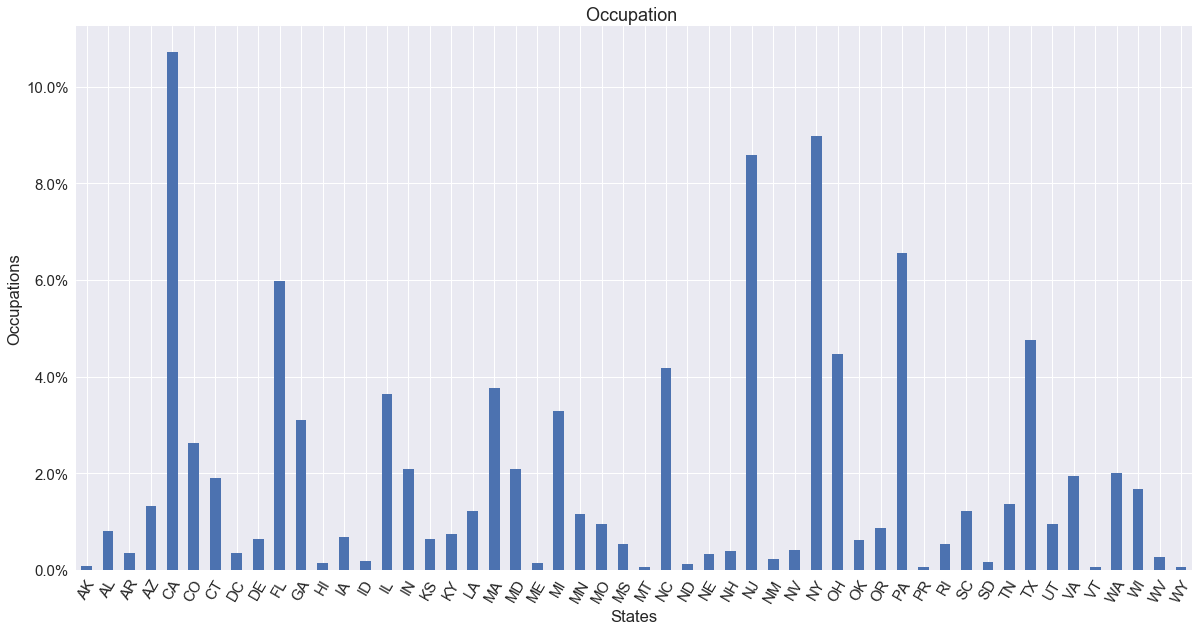

In [834]:
#occ_counts = os2013.groupby(['state_code', 'major_group'])['counts_total'].sum().groupby(level=0).sum().to_frame()

os2013_cross_states = occupation_cross_states(os2013, to_percentage=True)
os2013_cross_states.columns = ['Data@Work']

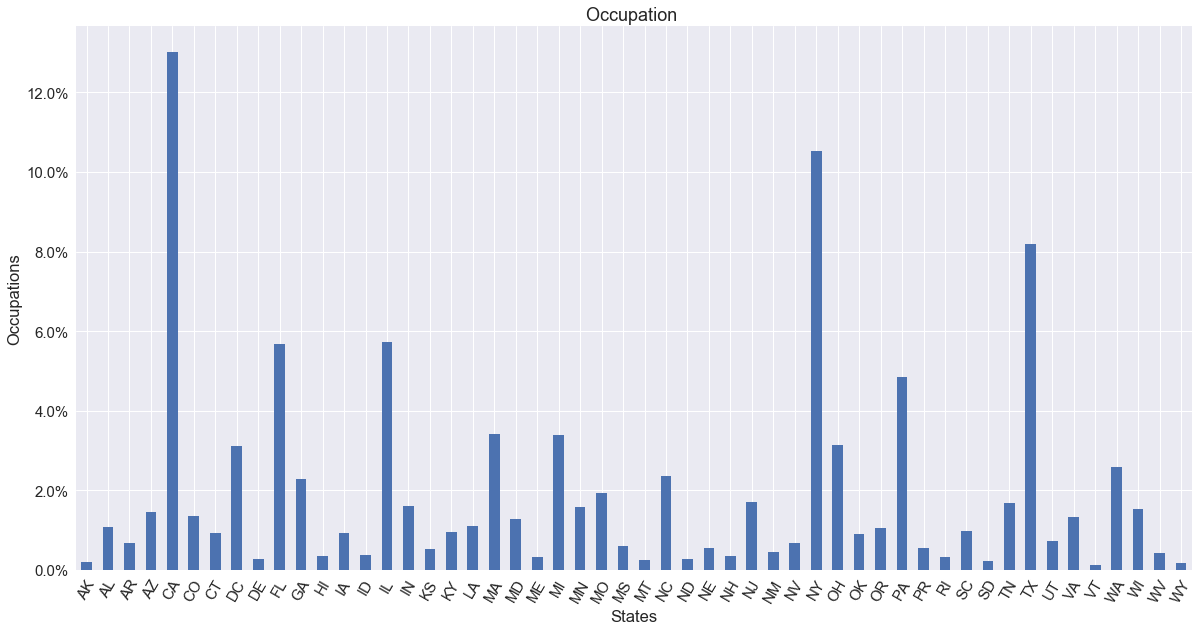

In [836]:
msa2013_cross_states = occupation_cross_states(msa2013, to_percentage=True)
msa2013_cross_states.columns = ['BLS']

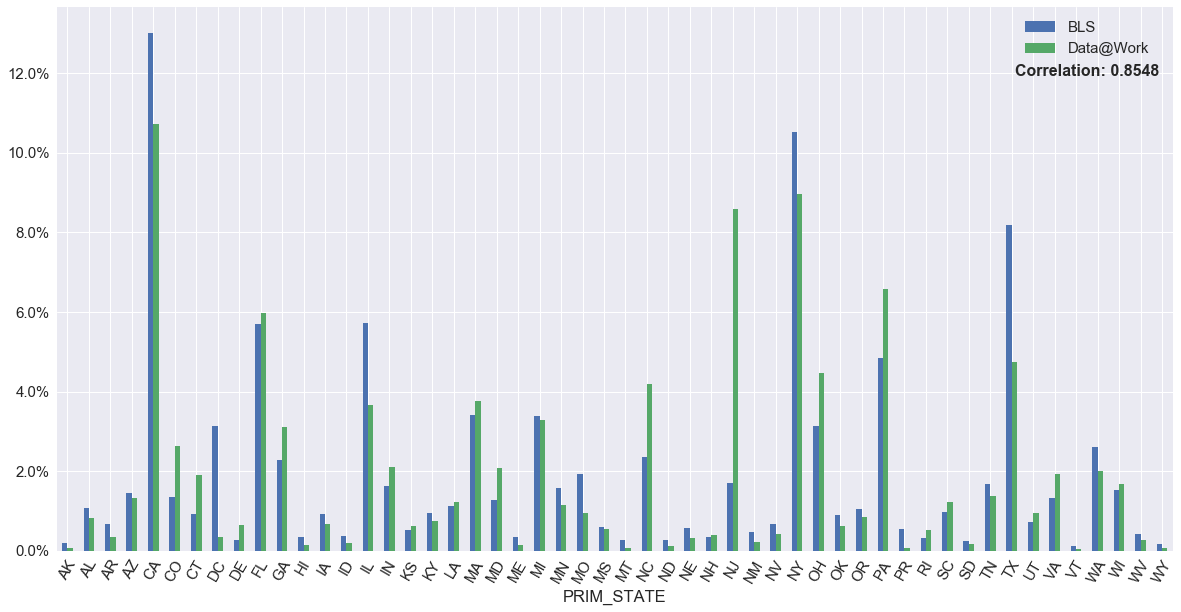

In [1009]:
df_list = [msa2013_cross_states, os2013_cross_states]
data = pd.concat(df_list, axis=1, join_axes=[df_list[0].index])
ax = data.plot.bar(figsize=(20,10))
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.1f}%'.format(x*100) for x in vals])
ax.set_xticklabels(df_list[0].index,rotation=60)
#ax.set_title('Correlation: %.4f' % data.corr().iloc[1].iloc[0])
import matplotlib.offsetbox as offsetbox 
a = ax.legend()
box = a._legend_box
txt = offsetbox.TextArea('Correlation: %.4f' % data.corr().iloc[1].iloc[0], textprops={'size':16, 'weight':'bold'})
box.get_children().append(txt)
box.set_figure(box.figure)

In [1062]:
occ = msa2013[msa2013['OCC_GROUP']=='major'].groupby('OCC_CODE')['TOT_EMP'].sum().to_frame()
occ_name = 'BLS'
diff = set([str(11+2*x)+'-0000' for x in range(1, 23)]) - set(occ.index)
print(diff)
occ = occ / occ.sum()
occ.columns=[occ_name]
occ = occ.append(pd.DataFrame({occ_name: [0]*len(diff)}, index=diff))
occ.sort_index(inplace=True)

{'55-0000'}


In [1063]:
occ2 = os2013.groupby('major_group')['counts_total'].sum().to_frame()
occ2_name = 'Data@Work'
diff = set([str(11+2*x)+'-0000' for x in range(1, 23)]) - set(occ.index)
occ2 = occ2 / occ2.sum()
occ2.columns=[occ2_name]
occ2 = occ2.append(pd.DataFrame({occ2_name: [0]*len(diff)}, index=diff))
occ2.sort_index(inplace=True)

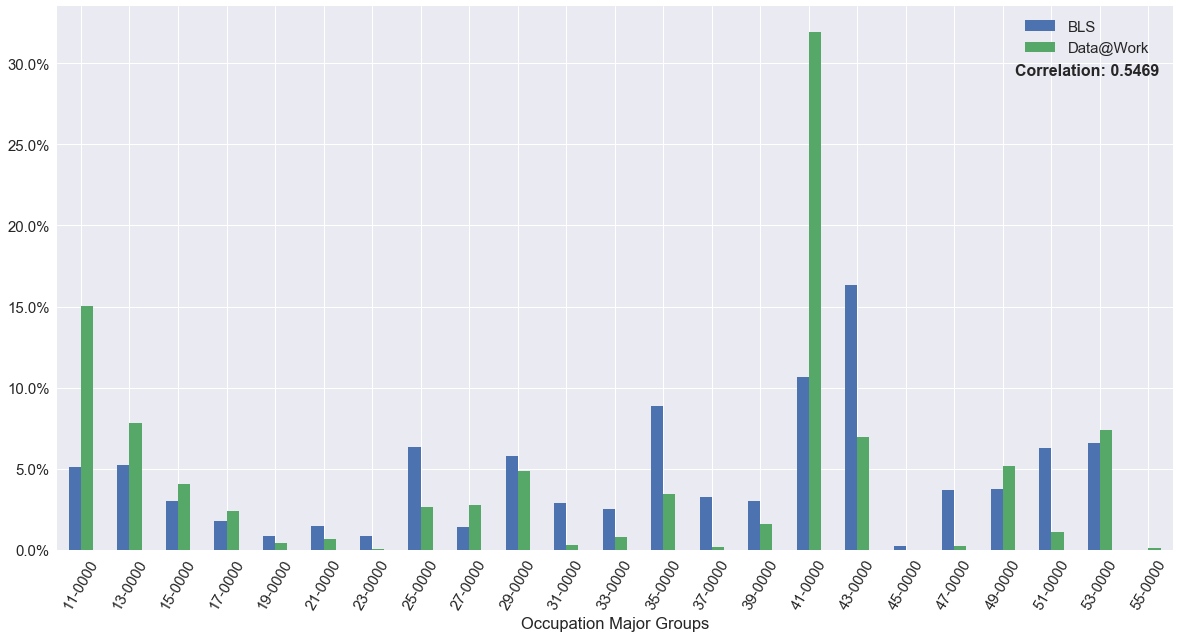

In [1064]:
df_list = [occ, occ2]
data = pd.concat(df_list, axis=1, join_axes=[df_list[0].index])
ax = data.plot.bar(figsize=(20,10))
vals = ax.get_yticks()
ax.set_xlabel('Occupation Major Groups')
ax.set_yticklabels(['{:3.1f}%'.format(x*100) for x in vals])
ax.set_xticklabels(df_list[0].index,rotation=60)
# ax.set_title('Correlation: %.4f' % data.corr().iloc[1].iloc[0])
import matplotlib.offsetbox as offsetbox 
a = ax.legend()
box = a._legend_box
txt = offsetbox.TextArea('Correlation: %.4f' % data.corr().iloc[1].iloc[0], textprops={'size':16, 'weight':'bold'})
box.get_children().append(txt)
box.set_figure(box.figure)

In [1008]:
dw2013q1 = pd.read_csv('Data@Work/2013Q1.csv')
dw2013q2 = pd.read_csv('Data@Work/2013Q2.csv')
dw2013q3 = pd.read_csv('Data@Work/2013Q3.csv')
dw2013q4 = pd.read_csv('Data@Work/2013Q4.csv')
dw2013 = pd.concat([dw2013q1, dw2013q2, dw2013q3, dw2013q4], ignore_index=True)

In [933]:
dw2013['major_group'] = pd.Series(list(map(lambda x: x[:2]+'-0000', dw2013['soc_code'])))

In [936]:
dw2013['counts_total'].sum()

2373163

In [1070]:
for i in lookup.keys():
    if 'New York' in lookup[i]:
        print(i, lookup[i])

35620 New York-Northern New Jersey-Long Island, NY-NJ-PA Metro Area
